In [350]:
#Let us start by importing the libraries that we deem important as of now. I'm sure that as we proceed, we will find the need to
# import some more libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [351]:
#read the input dataset
alldata = pd.read_csv(r'C:\Users\vinay\OneDrive\Documents\Upgrad\Downloads\train.csv')
alldata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [352]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We have a total of 81 columns of either numeric or categorical type. We will, of course, by default, consider all the numeric fields for evaluation, but we also need to check if there are any categorical fields that we can reasonably convert to numeric type. <br>
For eg., <b>HouseStyle: </b> We can convert each value to numeric as they can be mapped ordinally on category. For eg., desirability-wise 1Story < 1.5Unf < 1.5Fin < 2Story and so on. SFoyer and SLvl, althogh mentioned in the dictionary, are not present in the dataset itself. Therfore these values can be ignored

<b>Let us check the viability of the fields. </b>
<br>What are the explicitly numeric fields that we can readily use in Linear Regression? Can some of the categorical fields be organically converted to Numeric? Are there any null values that we should treat?


<b>N</b> = Numeric, <b>C</b> = Categorical, <b>CN</b> = Categorical but can be reasonably converted to numeric
<br>
<br>
<b>MSSubclass:</b> Can be left out as it's a combination of several categorical and numberic fields that are separately present in the dataset anyway
<br>
<b>HouseStyle:</b> We can convert each value to numeric as they can be mapped ordinally on category. For eg., desirability-wise 1Story < 1.5Unf < 1.5Fin < 2Story and so on. SFoyer and SLvl, althogh mentioned in the dictionary, are not present in the dataset itself. Therfore these values can be ignored.
<br>
<br>
<b> Let's look at each field one by one </b> 
<br>
'Id' - Just the unique ID for each property and will not be used for analysis
<br>'MSSubClass' - C. This is a very unorganized field with multiple parameters that can be separately found in other individual fields. We can ignore this one.
<br>'MSZoning' - C
<br>'LotFrontage' - N
<br>'LotArea' - N
<br>'Street' - CN
<br>'Alley' - CN
<br>'LotShape' - CN
<br>'LandContour' - C
<br>'Utilities' - CN
<br>'LotConfig' - C
<br>'LandSlope' - CN
<br>'Neighborhood' - C
<br>'Condition1' - C
<br>'Condition2' - C
<br>'BldgType' - C
<br>'HouseStyle' - CN
<br>'OverallQual' - N
<br>'OverallCond' - N
<br>'YearBuilt' - N
<br>'YearRemodAdd' - N
<br>'RoofStyle' - C
<br>'RoofMatl' - C
<br>'Exterior1st' - C
<br>'Exterior2nd' - C
<br>'MasVnrType' - C
<br>'MasVnrArea' - N
<br>'ExterQual' - CN
<br>'ExterCond' - CN
<br>'Foundation' - C
<br>'BsmtQual' - CN
<br>'BsmtCond' - CN
<br>'BsmtExposure' - CN
<br>'BsmtFinType1' - C
<br>'BsmtFinSF1' - N
<br>'BsmtFinType2' - CN
<br>'BsmtFinSF2' - N
<br>'BsmtUnfSF' - N
<br>'TotalBsmtSF' - N
<br>'Heating' - C
<br>'HeatingQC' - CN
<br>'CentralAir' - CN
<br>'Electrical' - CN
<br>'1stFlrSF' - N
<br>'2ndFlrSF' - N
<br>'LowQualFinSF' - N
<br>'GrLivArea' - N
<br>'BsmtFullBath' - N
<br>'BsmtHalfBath' - N
<br>'FullBath' - N
<br>'HalfBath' - N
<br>'BedroomAbvGr' - N
<br>'KitchenAbvGr' - N
<br>'KitchenQual' - CN
<br>'TotRmsAbvGrd' - N
<br>'Functional' - CN
<br>'Fireplaces' - N
<br>'FireplaceQu' - CN
<br>'GarageType' - C
<br>'GarageYrBlt' - N
<br>'GarageFinish' - CN
<br>'GarageCars' - N
<br>'GarageArea' - N
<br>'GarageQual' - CN
<br>'GarageCond' - CN
<br>'PavedDrive' - CN
<br>'WoodDeckSF' - N
<br>'OpenPorchSF' - N
<br>'EnclosedPorch' - N
<br>'3SsnPorch' - N
<br>'ScreenPorch' - N
<br>'PoolArea' - N
<br>'PoolQC' - CN
<br>'Fence' - C
<br>'MiscFeature' - C
<br>'MiscVal' - N
<br>'MoSold' - N (but it needs to be used i nconjunction to 'YrSold' to make sense. So we will skip this and only consider 'Yrsold'
<br>'YrSold' - N
<br>'SaleType' - C
<br>'SaleCondition' - C
<br>'SalePrice' - This will be the target variable.

In [353]:
#find all the columns that have nulls in them
for str in list(alldata.keys()):
    if alldata[str].hasnans:
        print(str)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


From these we will only evaluate the numeric data or the categorical data that we can reasonably convert to numeric.
<br>
<b> N = Numeric, C = Categorical, CN = Categorical but can be reasonably converted to numeric </b>
<br>
<b>LotFrontage </b> - N 259 nulls. We can safely replace these with 0 (no linear street connected to property)
<br>
<b>Alley</b> - CN 1369 nulls. We will drop this column. 
<br>
MasVnrType - C
<br>
<b>MasVnrArea </b> - N 8 nulls. We can safely replace these with 0.
<br>
<b> BsmtQual </b> - CN 37 nulls. We can safely replace these with NA (0)
<br>
<b>BsmtCond </b> - CN 37 nulls. We can safely replace these with NA (0)
<br>
<b>BsmtExposure </b> - CN 38 nulls. We can safely replace these with NA (0)
<br>
<b>BsmtFinType1 </b> - CN 37 nulls. We can safely replace these with NA (0)
<br>
<b>BsmtFinType2 </b>- CN 38 nulls. We can safely replace these with NA (0)
<br>
Electrical - C
<br>
<b>FireplaceQu </b>- CN 690 nulls. We should not consider this column. We still have the FirePlaces column that gives us the total fireplaces and the condition of the fireplace should not be a major determining factor.
<br>
GarageType - C
<br>
<b>GarageYrBlt </b> - N 81 nulls. Let's take the YearBuilt to impute this instead, as that should be the most likely year the garage is built too. 
<br>
<b>GarageFinish </b>- CN 81 nulls. We can just say there is no garage (replace with NA = 0)
<br>
<b>GarageQual </b>- CN 81 nulls. We can just say there is no garage (replace with NA = 0)
<br>
<b>GarageCond </b>- CN 81 nulls. We can just say there is no garage (replace with NA = 0)
<br>
<b>PoolQC </b>- CN 1453 nulls. We should definitely skip this one.
<br>
Fence - C 
<br>
MiscFeature - C

<br><br><br>
<b>Now we drop the columns that we will ignore for our analysis</b> (Categorical, except for the ones that we will reasonably convert to numeric values. Also, we will <b>remove</b> the variable <b>'MoSold'</b> even though it is numeric, because it shows the month the property was sold, which is of little value without the year, for which we already have a separate column. Further, we will delete columns <b>'FireplaceQu'</b> and <b>'PoolQC'</b> as these have so many null values that we should choose to ignore them rather than to impute them.)

In [354]:
cleandatawithnulls = alldata.drop(['Id'
,'MSZoning'
,'Alley'
,'LandContour'
,'LotConfig'
,'Neighborhood'
,'Condition1'
,'Condition2'
,'Electrical'
,'BldgType'
,'RoofStyle'
,'RoofMatl'
,'Exterior1st'
,'Exterior2nd'
,'GarageType'
,'MasVnrType'
,'Foundation'
,'Fence'
,'MiscFeature'
,'MoSold'
,'SaleType'
,'SaleCondition'
,'FireplaceQu'
,'PoolQC'], axis=1)

In [355]:
cleandatawithnulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  MasVnrArea     1452 non-null   float64
 13  ExterQual      1460 non-null   object 
 14  ExterCond      1460 non-null   object 
 15  BsmtQual       1423 non-null   object 
 16  BsmtCond       1423 non-null   object 
 17  BsmtExposure   1422 non-null   object 
 18  BsmtFinT

In [356]:
cleandatawithnulls.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,60,65.0,8450,Pave,Reg,AllPub,Gtl,2Story,7,5,...,Y,0,61,0,0,0,0,0,2008,208500
1,20,80.0,9600,Pave,Reg,AllPub,Gtl,1Story,6,8,...,Y,298,0,0,0,0,0,0,2007,181500
2,60,68.0,11250,Pave,IR1,AllPub,Gtl,2Story,7,5,...,Y,0,42,0,0,0,0,0,2008,223500
3,70,60.0,9550,Pave,IR1,AllPub,Gtl,2Story,7,5,...,Y,0,35,272,0,0,0,0,2006,140000
4,60,84.0,14260,Pave,IR1,AllPub,Gtl,2Story,8,5,...,Y,192,84,0,0,0,0,0,2008,250000


<br><br><b>Let us now impute the null values in the columns we identified for imputation above.</b>

In [357]:
#LotFrontage, MasVnrArea: replace nulls with 0
cleandatawithnulls[['LotFrontage','MasVnrArea']] = cleandatawithnulls[['LotFrontage','MasVnrArea']].fillna(0)

In [358]:
cleandatawithnulls['BsmtQual'].fillna("0",inplace=True)
cleandatawithnulls['BsmtQual'] = cleandatawithnulls['BsmtQual'].replace(['Ex', 'Gd', 'TA', 'Fa','Po'], ['5','4','3','2','1'])

In [359]:
cleandatawithnulls['BsmtCond'].fillna("0",inplace=True)
cleandatawithnulls['BsmtCond'] = cleandatawithnulls['BsmtCond'].replace(['Ex', 'Gd', 'TA', 'Fa','Po'], ['5','4','3','2','1'])

In [360]:
cleandatawithnulls['BsmtExposure'].fillna("0",inplace=True)
cleandatawithnulls['BsmtExposure'] = cleandatawithnulls['BsmtExposure'].replace(['Gd', 'Av', 'Mn', 'No'], ['4','3','2','1'])

In [361]:
cleandatawithnulls['BsmtFinType1'].fillna("0",inplace=True)
cleandatawithnulls['BsmtFinType1'] = cleandatawithnulls['BsmtFinType1'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec','LwQ','Unf'], ['6','5','4','3','2','1'])

In [362]:
cleandatawithnulls['BsmtFinType2'].fillna("0",inplace=True)
cleandatawithnulls['BsmtFinType2'] = cleandatawithnulls['BsmtFinType2'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec','LwQ','Unf'], ['6','5','4','3','2','1'])

In [363]:
cleandatawithnulls['GarageFinish'].fillna("0",inplace=True)
cleandatawithnulls['GarageFinish'] = cleandatawithnulls['GarageFinish'].replace(['Fin', 'RFn', 'Unf'], ['3','2','1'])

In [364]:
cleandatawithnulls['GarageQual'].fillna("0",inplace=True)
cleandatawithnulls['GarageQual'] = cleandatawithnulls['GarageQual'].replace(['Ex', 'Gd', 'TA','Fa','Po'], ['5','4','3','2','1'])

In [365]:
cleandatawithnulls['GarageCond'].fillna("0",inplace=True)
cleandatawithnulls['GarageCond'] = cleandatawithnulls['GarageCond'].replace(['Ex', 'Gd', 'TA','Fa','Po'], ['5','4','3','2','1'])

In [366]:
cleandatawithnulls['GarageYrBlt'].fillna(cleandatawithnulls.YearBuilt,inplace=True)

In [367]:
#find all the columns that have nulls in them
count = 0
for str in list(cleandatawithnulls.keys()):
    if cleandatawithnulls[str].hasnans:
        count += 1
        print(str)
print("Count: ", count)

Count:  0


As we can see now, there are no null values left in the dataframe and all the chosen categorical values are now converted to corresponding ordinal numeric values

In [368]:
cleandata = cleandatawithnulls
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  MasVnrArea     1460 non-null   float64
 13  ExterQual      1460 non-null   object 
 14  ExterCond      1460 non-null   object 
 15  BsmtQual       1460 non-null   object 
 16  BsmtCond       1460 non-null   object 
 17  BsmtExposure   1460 non-null   object 
 18  BsmtFinT

Let's start dropping the unnecessary categorical columns before imputing the other categorical columns to numerics

In [369]:
cleandata.drop(['MSSubClass','MasVnrArea','Heating','CentralAir'], axis=1,inplace=True)

In [370]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   Street         1460 non-null   object 
 3   LotShape       1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   LandSlope      1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  ExterQual      1460 non-null   object 
 12  ExterCond      1460 non-null   object 
 13  BsmtQual       1460 non-null   object 
 14  BsmtCond       1460 non-null   object 
 15  BsmtExposure   1460 non-null   object 
 16  BsmtFinType1   1460 non-null   object 
 17  BsmtFinSF1     1460 non-null   int64  
 18  BsmtFinT

<br>
<br>
<b> Let's do a quick test to see if some of the categorical variables we perceive as ordinal, like 'OverallQual' is indeed linearly correlated to the price </b>

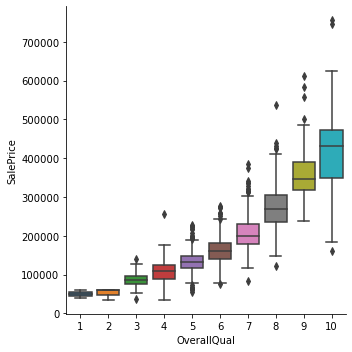

In [371]:
sns.catplot(data=alldata, x='OverallQual', y='SalePrice', kind='box')

We see a definite increase in SalePrice as the OverallQual value increases. 
<br>
<br>
Also non-ordinal categorical variables, like 'Condition1' should not display any particular trend in SalePrice.


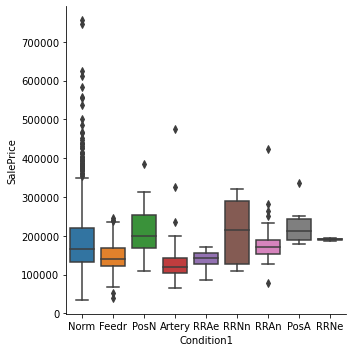

In [372]:
sns.catplot(data=alldata, x='Condition1', y='SalePrice', kind='box')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

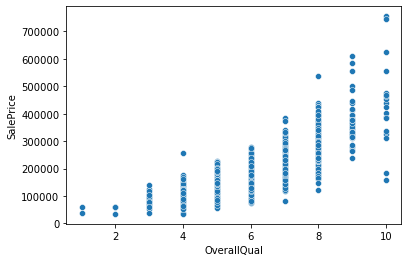

In [373]:
sns.scatterplot(data = alldata, x = 'OverallQual', y = 'SalePrice')

Our assumption seems correct, so let's go with it. Let's convert similar ordinal categorical variables to numeric values.

In [374]:
cleandata['Street'] = cleandata['Street'].replace(['Grvl', 'Pave'], ['1','2'])

In [375]:
cleandata['LotShape'] = cleandata['LotShape'].replace(['Reg', 'IR1', 'IR2', 'IR3'], ['4','3','2','1'])

In [376]:
cleandata['Utilities'] = cleandata['Utilities'].replace(['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], ['4','3','2','1'])

In [377]:
cleandata['LandSlope'] = cleandata['LandSlope'].replace(['Gtl', 'Mod', 'Sev'], ['3','2','1'])

In [378]:
cleandata['HouseStyle'] = cleandata['HouseStyle'].replace(['1Story', '1.5Unf', '1.5Fin','2Story','2.5Unf','2.5Fin'], ['1','2','3','4','5','6'])

In [379]:
cleandata['ExterQual'] = cleandata['ExterQual'].replace(['Ex', 'Gd', 'TA','Fa','Po'], ['5','4','3','2','1'])

In [380]:
cleandata['ExterCond'] = cleandata['ExterCond'].replace(['Ex', 'Gd', 'TA','Fa','Po'], ['5','4','3','2','1'])

In [381]:
cleandata['HeatingQC'] = cleandata['HeatingQC'].replace(['Ex', 'Gd', 'TA','Fa','Po'], ['5','4','3','2','1'])

In [382]:
cleandata['KitchenQual'] = cleandata['KitchenQual'].replace(['Ex', 'Gd', 'TA','Fa','Po'], ['5','4','3','2','1'])

In [383]:
cleandata['Functional'] = cleandata['Functional'].replace(['Typ', 'Min1', 'Min2','Mod','Maj1','Maj2','Sev','Sal'], ['8','7','6','5','4','3','2','1'])

In [384]:
cleandata['PavedDrive'] = cleandata['PavedDrive'].replace(['Y', 'P', 'N'], ['3','2','1'])

In [385]:
cleandata.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,2,4,4,3,4,7,5,2003,...,3,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,2,4,4,3,1,6,8,1976,...,3,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,2,3,4,3,4,7,5,2001,...,3,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,2,3,4,3,4,7,5,1915,...,3,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,2,3,4,3,4,8,5,2000,...,3,192,84,0,0,0,0,0,2008,250000


<br>
<br>
Let's now export the clean data to a csv and add a filter to the columns. By this we can check whether all the values present in each column is within the acceptable list of values.

In [387]:
cleandata.to_csv(r'C:\Users\vinay\OneDrive\Documents\Upgrad\Downloads\cleandata.csv')

It was a good decision to cross check the column values. I found that the column <b>HouseStyle</b> contains the values <b>'SFoyer'</b> and <b>'SLvl' </b>that I had assumed weren't present. However, these are purely categorical values that do not blend with the other ordinal values present in the column. Also, there are <b>only 102 rows</b> with these values, which is less than 10% of the total data. Therefore, we can safely <b>delete those rows</b>.

In [388]:
hs = cleandata[ (cleandata['HouseStyle'] == 'SFoyer') | (cleandata['HouseStyle'] == 'SLvl') ].index
cleandata.drop(hs , inplace=True)

In [389]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1358 non-null   float64
 1   LotArea        1358 non-null   int64  
 2   Street         1358 non-null   object 
 3   LotShape       1358 non-null   object 
 4   Utilities      1358 non-null   object 
 5   LandSlope      1358 non-null   object 
 6   HouseStyle     1358 non-null   object 
 7   OverallQual    1358 non-null   int64  
 8   OverallCond    1358 non-null   int64  
 9   YearBuilt      1358 non-null   int64  
 10  YearRemodAdd   1358 non-null   int64  
 11  ExterQual      1358 non-null   object 
 12  ExterCond      1358 non-null   object 
 13  BsmtQual       1358 non-null   object 
 14  BsmtCond       1358 non-null   object 
 15  BsmtExposure   1358 non-null   object 
 16  BsmtFinType1   1358 non-null   object 
 17  BsmtFinSF1     1358 non-null   int64  
 18  BsmtFinT

In [322]:
#I'm commenting out this code as it was only to check the data with the deleted rows in excel again, which I have verified and confirmed.
#cleandata.to_csv(r'C:\Users\vinay\OneDrive\Documents\Upgrad\Downloads\cleandata2.csv')

<br>
<br>
<br>
The next big step is to convert all the selected columns that are <b>categorical (object type) to numeric</b>.

In [390]:
cleandata = cleandata.astype({'Street': int, 'LotShape': int, 'Utilities': int, 'LandSlope': int, 'HouseStyle': int, 'ExterQual': int, 'ExterCond': int, 'BsmtQual': int, 'BsmtCond': int, 'BsmtExposure': int, 'BsmtFinType1': int, 'BsmtFinType2': int, 'HeatingQC': int, 'KitchenQual': int, 'Functional': int, 'GarageFinish': int, 'GarageQual': int, 'GarageCond': int, 'PavedDrive': int   })

In [391]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1358 non-null   float64
 1   LotArea        1358 non-null   int64  
 2   Street         1358 non-null   int32  
 3   LotShape       1358 non-null   int32  
 4   Utilities      1358 non-null   int32  
 5   LandSlope      1358 non-null   int32  
 6   HouseStyle     1358 non-null   int32  
 7   OverallQual    1358 non-null   int64  
 8   OverallCond    1358 non-null   int64  
 9   YearBuilt      1358 non-null   int64  
 10  YearRemodAdd   1358 non-null   int64  
 11  ExterQual      1358 non-null   int32  
 12  ExterCond      1358 non-null   int32  
 13  BsmtQual       1358 non-null   int32  
 14  BsmtCond       1358 non-null   int32  
 15  BsmtExposure   1358 non-null   int32  
 16  BsmtFinType1   1358 non-null   int32  
 17  BsmtFinSF1     1358 non-null   int64  
 18  BsmtFinT

Now there are no object-type columns left in the dataframe.

In [394]:
cleandata.head(100)


,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,2,4,4,3,4,7,5,2003,...,3,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,2,4,4,3,1,6,8,1976,...,3,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,2,3,4,3,4,7,5,2001,...,3,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,2,3,4,3,4,7,5,1915,...,3,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,2,3,4,3,4,8,5,2000,...,3,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,77.0,9320,2,3,4,3,1,4,5,1959,...,3,352,0,0,0,0,0,400,2010,128950
100,0.0,10603,2,3,4,3,1,6,7,1977,...,3,168,68,0,0,0,0,0,2010,205000
101,77.0,9206,2,4,4,3,4,6,5,1985,...,3,192,46,0,0,0,0,0,2010,178000
102,64.0,7018,2,4,4,3,1,5,5,1979,...,3,0,0,0,0,0,0,0,2009,118964


In [395]:
cleandatabkup = cleandata #Just a backup, in case we accidentally corrupt cleandata in the next steps

In [396]:
cleandatabkup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1358 non-null   float64
 1   LotArea        1358 non-null   int64  
 2   Street         1358 non-null   int32  
 3   LotShape       1358 non-null   int32  
 4   Utilities      1358 non-null   int32  
 5   LandSlope      1358 non-null   int32  
 6   HouseStyle     1358 non-null   int32  
 7   OverallQual    1358 non-null   int64  
 8   OverallCond    1358 non-null   int64  
 9   YearBuilt      1358 non-null   int64  
 10  YearRemodAdd   1358 non-null   int64  
 11  ExterQual      1358 non-null   int32  
 12  ExterCond      1358 non-null   int32  
 13  BsmtQual       1358 non-null   int32  
 14  BsmtCond       1358 non-null   int32  
 15  BsmtExposure   1358 non-null   int32  
 16  BsmtFinType1   1358 non-null   int32  
 17  BsmtFinSF1     1358 non-null   int64  
 18  BsmtFinT

<br>
<br>
<br>
<font color = 'blue'>
<b><font size = '5'>
Now that we have all the data we need in numeric form, we can proceed to built the predictive model. 
<font size>    
    </b>

<br>
<br>
<br>
<b><font size = '3'>
    First let's us see what results a <font size = '4'>Linear Regression </font size>model gives us
<font size>    
    </b>

In [414]:
#First we create the datasets for X (predictors) and y(response)
X = cleandata.iloc[:,:-1] #All columns except for SalePrice
y = np.array(cleandata['SalePrice']).reshape(-1,1) #Only the SalePrice column


In [415]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1358 non-null   float64
 1   LotArea        1358 non-null   int64  
 2   Street         1358 non-null   int32  
 3   LotShape       1358 non-null   int32  
 4   Utilities      1358 non-null   int32  
 5   LandSlope      1358 non-null   int32  
 6   HouseStyle     1358 non-null   int32  
 7   OverallQual    1358 non-null   int64  
 8   OverallCond    1358 non-null   int64  
 9   YearBuilt      1358 non-null   int64  
 10  YearRemodAdd   1358 non-null   int64  
 11  ExterQual      1358 non-null   int32  
 12  ExterCond      1358 non-null   int32  
 13  BsmtQual       1358 non-null   int32  
 14  BsmtCond       1358 non-null   int32  
 15  BsmtExposure   1358 non-null   int32  
 16  BsmtFinType1   1358 non-null   int32  
 17  BsmtFinSF1     1358 non-null   int64  
 18  BsmtFinT

In [417]:
len(y)
#As you see below, y too has 1358 entries

1358

In [419]:
y[0:20] #Just a quick glance at the first few rows in y

array([[208500],
       [181500],
       [223500],
       [140000],
       [250000],
       [143000],
       [307000],
       [200000],
       [129900],
       [118000],
       [129500],
       [345000],
       [144000],
       [279500],
       [157000],
       [132000],
       [149000],
       [ 90000],
       [159000],
       [139000]], dtype=int64)

In [420]:
#Let's split the data into train and test parts and then fit an LR line to it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [428]:
#Let's now initiate an LR model and fit an LR line into it
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [429]:
#Now let's find the intercept and coefficient values
print(lm.intercept_)
print(lm.coef_)

[-1995691.01963522]
[[ 7.40595751e+01  5.02911862e-01  2.81063315e+04 -3.45785481e+03
  -3.85873093e-08  4.01858985e+03 -5.15369208e+03  1.01918424e+04
   7.23883858e+03  1.93940515e+02 -3.66593101e+01  1.40669116e+04
  -7.61854791e+03  6.42782515e+03 -1.37618746e+04  4.38974557e+03
  -4.53226792e+02  2.21581682e+01 -1.42434971e+03  1.20343406e+01
  -1.73989392e+00  3.24526148e+01  1.67163550e+03  8.23675780e+00
   3.35935445e+01 -1.08457275e+01  3.09845749e+01 -3.29871396e+03
  -9.96875100e+03 -2.47378621e+03  2.95198929e+03 -6.89909979e+03
  -2.04422473e+04  1.00256238e+04  4.00557195e+03  5.04570296e+03
   6.56758239e+03  1.38566167e+01 -1.44950121e+03  3.43235999e+03
   3.57720185e+01  1.69303897e+03 -8.28828362e+03 -3.49141584e+02
   5.10836929e+00 -2.29824021e+01 -2.33468218e+00 -1.50395521e+01
   3.00675504e+01  5.50745777e+01  5.11612757e-01  7.44775337e+02]]


In [430]:
#Let's see how well the model is doing in terms of the error metrics
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr ** 0.5)



0.8652466749200534
0.6743273541015498
843153408386.2876
886273630827.4418
887529903.5645132


We see that the r2 value for the <b>training dataset is 86%</b> where as that for the <b>test dataset is only 67%</b>. This is a strong indication of <b>overfitting</b>.

<br>
<br> <font color ='blue'>
Let us see if we get any better result through <b><font size = '4'>Ridge regression<font size></b>

In [434]:
#First let's create a list of lambda values we will build the Ridge regression model against
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [435]:
#Now we will check what the best value for lambda is
print(model_cv.best_params_) #This gives us the highest negative mean absolute error

{'alpha': 100}


In [436]:
#Now that we know the best lambda is 100, we will fit it into the ridge regression model and run it again
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 8.30213164e+01  5.00661259e-01  6.83667346e+02 -2.99216961e+03
   0.00000000e+00  1.75025656e+03 -2.99051810e+03  1.08626727e+04
   5.95701624e+03  2.70349209e+02  3.20933009e+01  9.24890959e+03
  -3.64031253e+03  3.78586846e+03 -6.79852246e+03  3.67987165e+03
  -6.89235488e+02  2.26876124e+01 -1.41579017e+03  9.26268274e+00
  -1.54793189e+00  3.04023630e+01  2.12084917e+03  1.26019157e+01
   2.98823951e+01 -9.41668530e+00  3.30676260e+01 -1.57620105e+03
  -3.02871346e+03 -2.30906880e+03  1.47587334e+03 -6.15517384e+03
  -5.48682643e+03  8.36780166e+03  2.43984251e+03  3.28453317e+03
   5.34911621e+03  7.36260980e+00 -2.76052424e+02  1.88066524e+03
   3.93595649e+01 -2.27609559e+03 -3.28591603e+03 -6.78657114e+02
   6.43137613e+00 -1.88172313e+01 -4.25290569e-01 -1.79317608e+01
   3.35627114e+01  5.24815125e+01  4.37485704e-01  6.11311117e+02]]


In [437]:
#Let's see how well the model is doing in terms of the error metrics

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metric.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metric.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print(rss1_ridge)
metric.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print(rss2_ridge)
metric.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metric.append(mse_train_ridge ** 0.5)


0.8604164325889145
0.6705082166535195
873376301086.0798
896666891837.6108
919343474.8274524


We see that the r2 value for the <b>training dataset is still 86%</b> and that for the <b>test dataset is 67%</b>. This is a strong indication of <b>overfitting</b>. This shows that <b>Ridge regression is also not doing a good job of handling the overfitting.</b>

<br>
<br>
<br>
Let's see if <b>Lasso Regression </b> give us a better model

In [440]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [441]:
#let's find the best lambda
print(model_cv.best_params_)

{'alpha': 500}


In [442]:
#the best value for lambda is 500, so let's use this for our alpha
alpha = 500
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [444]:
#Find the coefficients
lasso.coef_

array([ 8.56821883e+01,  5.19983543e-01,  0.00000000e+00, -2.23892439e+03,
        0.00000000e+00,  0.00000000e+00, -1.90758988e+03,  1.14111593e+04,
        5.88183983e+03,  2.45943693e+02,  7.52712260e+00,  1.24824634e+04,
       -2.83196587e+03,  3.08803936e+03, -8.69611252e+03,  3.27141847e+03,
       -5.58908479e+02,  4.14271786e+01, -0.00000000e+00,  2.18865195e+01,
        1.87482386e+01,  1.26310119e+01,  1.10861609e+03,  3.53904442e+01,
        5.25319134e+01,  8.93380350e+00,  7.28988994e+00, -0.00000000e+00,
       -0.00000000e+00, -8.10312814e+01,  0.00000000e+00, -5.93464692e+03,
       -8.19146852e+03,  9.16106943e+03,  2.21540149e+03,  2.61439475e+03,
        5.20716238e+03,  1.02268527e+01, -0.00000000e+00,  0.00000000e+00,
        4.02756179e+01, -0.00000000e+00, -4.96276612e+03, -0.00000000e+00,
        7.04855556e+00, -1.96597733e+01, -3.27715069e+00, -1.71517044e+01,
        3.44658127e+01,  5.19052340e+01,  3.59902099e-01,  2.30354456e+02])

As we can see, unlike Ridge, Lasso regression has made <b>several coefficients 0</b>, thereby effectively removing those predictors from the equation.

In [445]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print(rss1_lasso)
metric.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print(rss2_lasso)
metric.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metric.append(mse_train_lasso ** 0.5)

0.860098460826896
0.6713628028231442
1.0973141021497226e+16
2204284238273920.0
921437741.8677136


We see that the r2 value for the <b>training dataset is still 86%</b> and that for the <b>test dataset is still 67%</b>. So Lasso regression too doesn't seem to have handled the overfitting well. 
<br>
<br>
<br>
Let's not try to <b>remove the ordinal category type variables</b> from the predictors and <b>retain only the purely numeric</b> predictors to see if that improves our model.

In [446]:
X = cleandata[['LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtQual' ,'BsmtCond' ,'BsmtExposure','BsmtFinType1' ,'BsmtFinSF1','BsmtFinType2' ,'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold']]

In [448]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1358 non-null   int64  
 1   OverallQual    1358 non-null   int64  
 2   OverallCond    1358 non-null   int64  
 3   YearBuilt      1358 non-null   int64  
 4   YearRemodAdd   1358 non-null   int64  
 5   BsmtQual       1358 non-null   int32  
 6   BsmtCond       1358 non-null   int32  
 7   BsmtExposure   1358 non-null   int32  
 8   BsmtFinType1   1358 non-null   int32  
 9   BsmtFinSF1     1358 non-null   int64  
 10  BsmtFinType2   1358 non-null   int32  
 11  BsmtFinSF2     1358 non-null   int64  
 12  BsmtUnfSF      1358 non-null   int64  
 13  TotalBsmtSF    1358 non-null   int64  
 14  1stFlrSF       1358 non-null   int64  
 15  2ndFlrSF       1358 non-null   int64  
 16  LowQualFinSF   1358 non-null   int64  
 17  GrLivArea      1358 non-null   int64  
 18  BsmtFull

In [450]:
#Let's split the data again into train and test datasets and run LR against them
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [451]:
#Let's now initiate an LR model and fit an LR line into it
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [452]:
#Now let's find the intercept and coefficient values
print(lm.intercept_)
print(lm.coef_)

[-1937513.19660444]
[[ 4.88817403e-01  1.40701196e+04  7.76149685e+03  3.11258451e+02
   9.83444091e+01  7.00335157e+03 -1.64642159e+04  4.34807832e+03
  -2.27076647e+02  2.33385158e+01 -1.84600151e+03  1.35396994e+01
   1.39633389e+00  3.82745491e+01  1.41753454e+01  3.03380109e+01
  -2.09360473e+01  2.35773090e+01 -2.71593676e+03 -9.70600507e+03
  -3.50645317e+03 -1.05843032e+02 -8.66977029e+03 -2.17175266e+04
   4.96062056e+03  6.14343905e+03  5.44164367e+01  2.41172968e+02
   4.45061787e+03  4.08034835e+01 -2.24109257e+03 -6.49131922e+03
   2.50628709e+00 -2.42579262e+01  7.11708893e+00 -1.70945522e+01
   2.76180179e+01  7.10400709e+01 -4.83948092e-01  4.92910467e+02]]


In [453]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr ** 0.5)

0.8514532395033287
0.6556179451203846
929459123499.9424
937188732347.952
978378024.7367815


Now the train <b>train dataset shows an R2 value of 85%</b> and the <b>test dataset is at 65%</b>. So, the LR model is still overfitting after removing the ordinal category type variables.

<br>
<br>
<br>
Let us try if <b>Ridge regression</b> give us any better result.

In [454]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [455]:
print(model_cv.best_params_)

{'alpha': 50}


In [456]:
alpha = 50
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 5.07756536e-01  1.39209764e+04  6.91425245e+03  3.39176029e+02
   1.42038548e+02  4.98366730e+03 -1.05634728e+04  4.08835993e+03
  -4.72209089e+02  2.33143055e+01 -1.87977451e+03  1.13831668e+01
   8.08063771e-01  3.55055358e+01  1.50384481e+01  2.83391730e+01
  -1.58731847e+01  2.75044371e+01 -1.68655925e+03 -4.68577848e+03
  -3.08560374e+03  2.10666962e+02 -7.87852343e+03 -9.02283418e+03
   3.57990660e+03  5.75891486e+03  3.78593103e+01  6.37648332e+02
   2.99297390e+03  4.40197302e+01 -3.48441950e+03 -4.09719602e+03
   3.48216944e+00 -2.03710534e+01  7.92289870e+00 -1.75425458e+01
   3.14363908e+01  6.61179628e+01 -4.20635996e-01  4.65128758e+02]]


In [457]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metric.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metric.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print(rss1_ridge)
metric.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print(rss2_ridge)
metric.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metric.append(mse_train_ridge ** 0.5)

0.8494936427461793
0.6567103372893167
941720347361.1936
934215936241.0638
991284576.1696775


Now the train dataset shows an r2 score of <b>84.9% </b>and the test dataset is at <b>65.6%</b>. So we conclude that the problem of overfitting is still not solved.

<br>
<br>
<br> <font color = 'blue'> <font size = '5'>
Let us see if <b>Lasso regression</b> solves this issue this time around.

In [458]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [459]:
#let's find the best lambda
print(model_cv.best_params_)

{'alpha': 500}


In [460]:
alpha = 500
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [461]:
lasso.coef_

array([ 5.27285642e-01,  1.48679937e+04,  6.26928304e+03,  3.27855597e+02,
        1.50464029e+02,  3.87008500e+03, -1.08030077e+04,  3.71335117e+03,
       -3.42394409e+02,  4.34685170e+01, -3.08383079e+02,  2.42182239e+01,
        2.22909700e+01,  1.50724494e+01,  3.49338129e+01,  4.89359155e+01,
        2.06108172e+00,  6.95411880e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -7.75124643e+03, -9.47359844e+03,
        3.09989891e+03,  4.94093676e+03,  2.54282377e+01,  0.00000000e+00,
        0.00000000e+00,  4.82036040e+01, -1.36914491e+03, -4.45648465e+03,
        4.84656535e+00, -1.99270040e+01,  4.24010454e+00, -2.20944098e+01,
        3.42219489e+01,  6.18042680e+01, -4.18542295e-01,  9.84415655e+01])

In [462]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print(rss1_lasso)
metric.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print(rss2_lasso)
metric.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metric.append(mse_train_lasso ** 0.5)

0.8478347357158246
0.6585408065414258
1.0918756632703576e+16
2194999649289432.5
1002210685.753985


<b>No luck with Lasso regression this time around either. </b>
<br>
<br>
<br>
<br>
<br>
<font color = 'blue'>
<font size = '5'>Let's then take a different approach and see if <b>Recursive Feature Elimination</b> does the trick for us in removing some of the non-required predictors.<font size>

In [509]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#############
XX = cleandata.iloc[:,:-1] #All columns except for SalePrice
yy = np.array(cleandata['SalePrice']).reshape(-1,1) #Only the SalePrice column
#############
lm = LinearRegression()
lm.fit(XX, yy)

rfe = RFE(lm, step=20)             # running RFE
rfe = rfe.fit(XX, yy)
list(zip(XX.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 3),
 ('LotArea', False, 3),
 ('Street', True, 1),
 ('LotShape', True, 1),
 ('Utilities', False, 3),
 ('LandSlope', True, 1),
 ('HouseStyle', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', False, 2),
 ('YearRemodAdd', False, 3),
 ('ExterQual', True, 1),
 ('ExterCond', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', False, 3),
 ('BsmtFinType2', False, 2),
 ('BsmtFinSF2', False, 3),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', False, 3),
 ('HeatingQC', True, 1),
 ('1stFlrSF', False, 3),
 ('2ndFlrSF', False, 3),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', False, 3),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 2),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Functional', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 2),

In [510]:
col = XX.columns[rfe.support_]
col

Index(['Street', 'LotShape', 'LandSlope', 'HouseStyle', 'OverallQual',
       'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive'],
      dtype='object')

In [511]:
# Now we will create the new xtest dataset with the factors we selected through RFE
XX_rfe = XX[col]

In [512]:
# Now we will check the Variability Inflation factor (VIF) for all the remaining variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = XX_rfe.columns
vif['VIF'] = [variance_inflation_factor(XX_rfe.values, i) for i in range(XX_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Street,363.36
24,GarageCond,209.15
23,GarageQual,205.35
2,LandSlope,140.69
20,Functional,139.72
6,ExterQual,111.26
7,ExterCond,96.07
18,KitchenQual,75.16
4,OverallQual,73.81
8,BsmtQual,63.41


In [513]:
# Before we proceed as per the drill we add a constant and create a fitted model. Then we check the
# parameters we get.
import statsmodels.api as sm
XX_lm1 = sm.add_constant(XX_rfe)
lr1 = sm.OLS(yy, XX_lm1).fit()
lr1.params

const          -144564.876994
Street           21114.645456
LotShape         -3686.402609
LandSlope       -12326.569585
HouseStyle       -6721.573307
OverallQual      16357.705434
OverallCond       5265.796371
ExterQual        12038.288679
ExterCond        -2729.378296
BsmtQual          9065.515470
BsmtCond        -12288.759219
BsmtExposure      7007.023409
BsmtFinType1      1873.174913
HeatingQC          745.318327
BsmtFullBath     10507.400718
FullBath         12502.751363
HalfBath         11648.441960
BedroomAbvGr     -2567.565346
KitchenAbvGr    -27656.151793
KitchenQual       9588.381160
TotRmsAbvGrd     14022.596267
Functional        3509.686560
Fireplaces       12073.057032
GarageCars       17085.477640
GarageQual        3051.059308
GarageCond       -9882.318916
PavedDrive        2641.888261
dtype: float64

In [514]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     208.0
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:07:42   Log-Likelihood:                -16180.
No. Observations:                1358   AIC:                         3.241e+04
Df Residuals:                    1331   BIC:                         3.255e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.446e+05   3.79e+04     -3.819   

Let's remove the predictor HeatingQC as that has the highest p-value in the list.

In [515]:
XX_new = XX_rfe.drop(["HeatingQC"], axis = 1)

In [516]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = XX_new.columns
vif['VIF'] = [variance_inflation_factor(XX_new.values, i) for i in range(XX_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Street,362.93
23,GarageCond,208.74
22,GarageQual,204.96
2,LandSlope,140.46
19,Functional,139.71
6,ExterQual,107.47
7,ExterCond,96.04
4,OverallQual,73.81
17,KitchenQual,73.15
8,BsmtQual,63.21


In [517]:
# Add a constant
XX_lm2 = sm.add_constant(XX_new)

# Create a first fitted model
lr2 = sm.OLS(yy, XX_lm2).fit()

In [518]:
lr2.params

const          -143414.890512
Street           20873.686033
LotShape         -3693.767451
LandSlope       -12241.670089
HouseStyle       -6707.674734
OverallQual      16363.003884
OverallCond       5306.113873
ExterQual        12362.788262
ExterCond        -2711.155188
BsmtQual          9137.182287
BsmtCond        -12295.199376
BsmtExposure      7011.532951
BsmtFinType1      1869.067983
BsmtFullBath     10539.045880
FullBath         12658.397833
HalfBath         11631.876269
BedroomAbvGr     -2584.028611
KitchenAbvGr    -27940.496839
KitchenQual       9816.363863
TotRmsAbvGrd     14013.692515
Functional        3490.275976
Fireplaces       12021.131491
GarageCars       17087.085929
GarageQual        2924.477855
GarageCond       -9754.555272
PavedDrive        2664.263414
dtype: float64

In [519]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     216.4
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:10:47   Log-Likelihood:                -16180.
No. Observations:                1358   AIC:                         3.241e+04
Df Residuals:                    1332   BIC:                         3.255e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.434e+05   3.78e+04     -3.794   

Remove feature GarageQual due to high p-value.

In [520]:
XX_new = XX_new.drop(["GarageQual"], axis = 1)

In [521]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = XX_new.columns
vif['VIF'] = [variance_inflation_factor(XX_new.values, i) for i in range(XX_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Street,362.49
2,LandSlope,140.45
19,Functional,139.67
6,ExterQual,107.47
7,ExterCond,96.01
4,OverallQual,73.81
17,KitchenQual,73.12
8,BsmtQual,63.12
9,BsmtCond,62.22
18,TotRmsAbvGrd,58.13


In [522]:
# Add a constant
XX_lm3 = sm.add_constant(XX_new)

# Create a first fitted model
lr3 = sm.OLS(yy, XX_lm3).fit()

In [523]:
lr3.params

const          -143179.018682
Street           20982.216836
LotShape         -3723.824345
LandSlope       -12266.826716
HouseStyle       -6655.325472
OverallQual      16362.997488
OverallCond       5323.822289
ExterQual        12351.313757
ExterCond        -2748.155639
BsmtQual          9088.522296
BsmtCond        -12312.800492
BsmtExposure      7015.419396
BsmtFinType1      1883.052447
BsmtFullBath     10506.364564
FullBath         12601.279504
HalfBath         11547.881933
BedroomAbvGr     -2627.002634
KitchenAbvGr    -27776.158334
KitchenQual       9845.841652
TotRmsAbvGrd     14005.180027
Functional        3501.932179
Fireplaces       12072.164304
GarageCars       17262.179088
GarageCond       -7019.511690
PavedDrive        2656.039690
dtype: float64

In [524]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.5
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:13:03   Log-Likelihood:                -16180.
No. Observations:                1358   AIC:                         3.241e+04
Df Residuals:                    1333   BIC:                         3.254e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.432e+05   3.78e+04     -3.789   

Remove the predictor ExterCond due to high p-value

In [529]:
XX_new = XX_new.drop(["ExterCond"], axis = 1)

In [530]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = XX_new.columns
vif['VIF'] = [variance_inflation_factor(XX_new.values, i) for i in range(XX_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Street,345.99
2,LandSlope,139.92
18,Functional,138.42
6,ExterQual,107.36
4,OverallQual,73.73
16,KitchenQual,73.00
7,BsmtQual,62.55
8,BsmtCond,61.13
17,TotRmsAbvGrd,58.13
1,LotShape,42.28


In [531]:
# Add a constant
XX_lm3 = sm.add_constant(XX_new)

# Create a first fitted model
lr3 = sm.OLS(yy, XX_lm3).fit()

In [527]:
lr3.params

const          -143179.018682
Street           20982.216836
LotShape         -3723.824345
LandSlope       -12266.826716
HouseStyle       -6655.325472
OverallQual      16362.997488
OverallCond       5323.822289
ExterQual        12351.313757
ExterCond        -2748.155639
BsmtQual          9088.522296
BsmtCond        -12312.800492
BsmtExposure      7015.419396
BsmtFinType1      1883.052447
BsmtFullBath     10506.364564
FullBath         12601.279504
HalfBath         11547.881933
BedroomAbvGr     -2627.002634
KitchenAbvGr    -27776.158334
KitchenQual       9845.841652
TotRmsAbvGrd     14005.180027
Functional        3501.932179
Fireplaces       12072.164304
GarageCars       17262.179088
GarageCond       -7019.511690
PavedDrive        2656.039690
dtype: float64

In [532]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     235.3
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:16:13   Log-Likelihood:                -16180.
No. Observations:                1358   AIC:                         3.241e+04
Df Residuals:                    1334   BIC:                         3.253e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.483e+05   3.73e+04     -3.975   

Remove predictor PavedDrive due to high p-value

In [533]:
XX_new = XX_new.drop(["PavedDrive"], axis = 1)

In [534]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = XX_new.columns
vif['VIF'] = [variance_inflation_factor(XX_new.values, i) for i in range(XX_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Street,334.74
2,LandSlope,139.90
18,Functional,138.08
6,ExterQual,107.30
4,OverallQual,73.73
16,KitchenQual,72.94
7,BsmtQual,62.54
8,BsmtCond,60.82
17,TotRmsAbvGrd,57.94
1,LotShape,42.28


In [535]:
# Add a constant
XX_lm3 = sm.add_constant(XX_new)

# Create a first fitted model
lr3 = sm.OLS(yy, XX_lm3).fit()

In [536]:
lr3.params

const          -144466.987158
Street           21647.729509
LotShape         -3724.637683
LandSlope       -12403.631065
HouseStyle       -6811.578415
OverallQual      16387.391870
OverallCond       4955.574556
ExterQual        12359.419122
BsmtQual          9290.941889
BsmtCond        -12393.358087
BsmtExposure      6961.006195
BsmtFinType1      1968.023400
BsmtFullBath     10286.616453
FullBath         12660.476113
HalfBath         11955.882316
BedroomAbvGr     -2517.839973
KitchenAbvGr    -27948.990214
KitchenQual       9842.376561
TotRmsAbvGrd     13928.903250
Functional        3479.775972
Fireplaces       12122.518509
GarageCars       17287.619172
GarageCond       -6549.386592
dtype: float64

In [537]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     245.9
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:19:13   Log-Likelihood:                -16181.
No. Observations:                1358   AIC:                         3.241e+04
Df Residuals:                    1335   BIC:                         3.253e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.445e+05   3.72e+04     -3.886   

Remove predictor Street due to high p-value

In [538]:
XX_new = XX_new.drop(["Street"], axis = 1)

In [539]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = XX_new.columns
vif['VIF'] = [variance_inflation_factor(XX_new.values, i) for i in range(XX_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Functional,117.80
1,LandSlope,112.02
5,ExterQual,102.26
3,OverallQual,73.17
15,KitchenQual,72.52
6,BsmtQual,62.49
7,BsmtCond,60.29
16,TotRmsAbvGrd,57.93
0,LotShape,39.17
14,KitchenAbvGr,31.80


In [540]:
# Add a constant
XX_lm3 = sm.add_constant(XX_new)

# Create a first fitted model
lr3 = sm.OLS(yy, XX_lm3).fit()

In [541]:
lr3.params

const          -104507.871612
LotShape         -3734.712742
LandSlope       -11616.949359
HouseStyle       -6821.033479
OverallQual      16433.993355
OverallCond       5008.150436
ExterQual        12692.654073
BsmtQual          9307.387419
BsmtCond        -12464.575853
BsmtExposure      6870.649570
BsmtFinType1      2022.658502
BsmtFullBath     10134.824218
FullBath         12647.224637
HalfBath         11987.227802
BedroomAbvGr     -2465.850112
KitchenAbvGr    -27789.834653
KitchenQual       9886.803981
TotRmsAbvGrd     13940.537178
Functional        3388.541785
Fireplaces       12104.674789
GarageCars       16983.974618
GarageCond       -6487.136296
dtype: float64

In [542]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     257.4
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:21:40   Log-Likelihood:                -16182.
No. Observations:                1358   AIC:                         3.241e+04
Df Residuals:                    1336   BIC:                         3.252e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.045e+05   1.98e+04     -5.282   

<br>
<br>
<font size ='4'>
<b> Now we have a good set of 21 predictors, all of which have a low p-value. Let us proceed with these predictors to rerun our LR, Ridge and Lasso models. </b>
<font size>

In [545]:
XX_lm3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         1358 non-null   float64
 1   LotShape      1358 non-null   int32  
 2   LandSlope     1358 non-null   int32  
 3   HouseStyle    1358 non-null   int32  
 4   OverallQual   1358 non-null   int64  
 5   OverallCond   1358 non-null   int64  
 6   ExterQual     1358 non-null   int32  
 7   BsmtQual      1358 non-null   int32  
 8   BsmtCond      1358 non-null   int32  
 9   BsmtExposure  1358 non-null   int32  
 10  BsmtFinType1  1358 non-null   int32  
 11  BsmtFullBath  1358 non-null   int64  
 12  FullBath      1358 non-null   int64  
 13  HalfBath      1358 non-null   int64  
 14  BedroomAbvGr  1358 non-null   int64  
 15  KitchenAbvGr  1358 non-null   int64  
 16  KitchenQual   1358 non-null   int32  
 17  TotRmsAbvGrd  1358 non-null   int64  
 18  Functional    1358 non-null 

In [546]:
len(yy)

1358

In [549]:
XX_lm3 = XX_lm3.drop(['const'],axis=1)

In [550]:
XX_lm3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1358 non-null   int32
 1   LandSlope     1358 non-null   int32
 2   HouseStyle    1358 non-null   int32
 3   OverallQual   1358 non-null   int64
 4   OverallCond   1358 non-null   int64
 5   ExterQual     1358 non-null   int32
 6   BsmtQual      1358 non-null   int32
 7   BsmtCond      1358 non-null   int32
 8   BsmtExposure  1358 non-null   int32
 9   BsmtFinType1  1358 non-null   int32
 10  BsmtFullBath  1358 non-null   int64
 11  FullBath      1358 non-null   int64
 12  HalfBath      1358 non-null   int64
 13  BedroomAbvGr  1358 non-null   int64
 14  KitchenAbvGr  1358 non-null   int64
 15  KitchenQual   1358 non-null   int32
 16  TotRmsAbvGrd  1358 non-null   int64
 17  Functional    1358 non-null   int32
 18  Fireplaces    1358 non-null   int64
 19  GarageCars    1358 non-null

<br>
<br>
<br>
<font size = '4'>
<b>Let's run the LR, Ridge and Lasso models with this new set of train and test datasets.</b>
<font size>

In [551]:
#First we create the datasets for X (predictors) and y(response)
X = XX_lm3
y = np.array(cleandata['SalePrice']).reshape(-1,1) #Only the SalePrice column

In [552]:
len(X)

1358

In [553]:
len(y)

1358

In [554]:
#Let's split the data into train and test parts and then fit an LR line to it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [555]:
#Let's now initiate an LR model and fit an LR line into it
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [556]:
#Now let's find the intercept and coefficient values
print(lm.intercept_)
print(lm.coef_)

[-113908.43651979]
[[ -5721.0683635   -6437.9718825   -5863.46783236  16196.77936669
    5526.56121238  11995.3298327   11170.106778   -14277.52537672
    6978.39146185   2287.04278716   9484.60343637   9313.09311173
   10448.62784762  -3697.32553421 -23132.62278483  11486.57243333
   14308.53941462   2769.87627006  13647.6714924   15499.39404307
   -6180.11161291]]


In [557]:
#Let's see how well the model is doing in terms of the error metrics
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr ** 0.5)

0.8059598340167182
0.7879276669493467
1214111987333.752
577125893064.5837
1278012618.2460546


Now the r2 score for the <b>training dataset is 80.5% </b>compared to <b>78.7% for the test </b>dataset. Both are good values and are close to each other. But let us see if Ridge or Lasso give us better fits.

In [558]:
#First let's create a list of lambda values we will build the Ridge regression model against
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [559]:
#Now we will check what the best value for lambda is
print(model_cv.best_params_) #This gives us the highest negative mean absolute error

{'alpha': 100}


In [560]:
#Now that we know the best lambda is 100, we will fit it into the ridge regression model and run it again
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[[-5871.35912983 -2811.04436604 -4374.59025177 17918.93888691
   4025.20309113 10318.74001719  9018.54725808 -7678.19501986
   7520.03315146  3029.93632103  6462.83940977  6329.97005655
   6594.97136251 -3006.21834004 -5956.18896213 11626.40765095
  13335.47131644  1490.2123456  11865.21229445 12840.74993974
  -2948.3873293 ]]


In [561]:
#Let's see how well the model is doing in terms of the error metrics

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metric.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metric.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print(rss1_ridge)
metric.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print(rss2_ridge)
metric.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metric.append(mse_train_ridge ** 0.5)

0.8008720041983038
0.7816114322600246
1245946608484.216
594314663204.6747
1311522745.772859


As we can see, the ridge regression model's r2 is <b>almost the same as that of the Linear Regression Model</b>. Although it is still a good score, we should still try and see if <b>Lasso Regression </b>gives us a better fit.

In [562]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [563]:
#let's find the best lambda
print(model_cv.best_params_)

{'alpha': 100}


In [565]:
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [566]:
lasso.coef_

array([ -5740.20023793,  -5003.27771044,  -5595.03374411,  16525.19578779,
         5298.41310157,  11746.26756934,  10908.37638299, -13435.57566265,
         7117.01182823,   2374.72591365,   9047.7875369 ,   8438.78712073,
         9712.45570847,  -3382.31565993, -20075.86438008,  11698.32279731,
        14069.7337198 ,   2280.48212875,  13606.46867742,  15277.50559448,
        -5697.42854207])

In [567]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print(rss1_lasso)
metric.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print(rss2_lasso)
metric.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metric.append(mse_train_lasso ** 0.5)

0.8058173461441842
0.7870175049807886
1.0698507026325114e+16
1992659200552397.2
1278951090.4336174


<font size = '7'>
    <br>
    <br>
<font color = 'blue'>
    Conclusion: <font size ='5'>
    <br>
    <br>
    
As we can see, the Lasso regression model did not fare any better than the Linear or Ridge regression models. It is safe to assume, therefore, that the set of <b>21 predictors</b> we chose to build the LR model on, <b>were all impactful to the final predictive power of our model.</b>

<font color = 'blue'>
<font size ='5'>
        The significant predictors as per our model are:
<font size = '3'>
<br>    
 LotShape<br>
 LandSlope<br>
 HouseStyle  <br>
 OverallQual   <br>
 OverallCond   <br>
 ExterQual   <br>
 BsmtQual      <br>
 BsmtCond      <br>
 BsmtExposure  <br>
 BsmtFinType1  <br>
 BsmtFullBath  <br>
 FullBath     <br>
 HalfBath     <br>
 BedroomAbvGr  <br>
 KitchenAbvGr  <br>
 KitchenQual  <br>
 TotRmsAbvGrd  <br>
 Functional   <br>
 Fireplaces    <br>
 GarageCars    <br>
 GarageCond   
 <br>
 <br>
 Together, these predictors explain about 80% of the variation in the SalePrice of the house in the training dataset, and about 78% of the variation in SalePrice in the test dataset. 
    
<br>
<br>
    Therefore, in real world scenario's we can expect the model to be around <b>78% accurate</b> in predicting the Price of houses when we consider the 21 predictors chosen.

<font size = '4'>
<font color = 'blue'>
<br>    
The optimal values for lambda were found to be:
<br>
<br>
<b>
Ridge: 100
<br>
Lasso: 100
    
<br>
<br>
<br>
<font color = 'green'>    
Note: We can (and probably should, in real world scenarios) manually and recursively check the VIF and p-value scores and keep removing variables one by one, till we get all p-values as 0 (but I haven't taken that approach in this assignment and used the RFE feature instead, as I was short of time). This will probably give us a more robust, stable and trustworthy model that can be used with more confidence no matter what data we present to the model.

<br>
<br>
<br>

<b> Below I am only testing out the ridge and lasso regression models with double the lambda values, as required in the subjective part of this assignment. </b>

In [569]:
alpha = 200
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=200)

In [570]:
lasso.coef_

array([ -5760.0024937 ,  -3568.74411006,  -5325.88911846,  16855.69748686,
         5069.87014237,  11496.60546041,  10645.33440088, -12592.82105897,
         7255.28922512,   2462.49751992,   8611.02749151,   7562.6784448 ,
         8974.69916102,  -3067.39824195, -17018.10729328,  11908.86168676,
        13830.55477904,   1790.7973135 ,  13564.51745455,  15056.22814374,
        -5215.19683615])

In [571]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print(rss1_lasso)
metric.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print(rss2_lasso)
metric.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metric.append(mse_train_lasso ** 0.5)

0.8053894614818429
0.7858545814123501
1.0663786851559288e+16
1987597524712439.2
1281769280.1360188


In [572]:
alpha = 200
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[[-5379.75234011 -1918.79352568 -3601.09719984 18241.79005296
   3183.48550209  9385.85089416  8205.121405   -5139.76441523
   7598.22691902  3434.73788245  5104.2152227   5687.47154117
   4887.57135863 -2493.27387314 -3540.91655582 10928.74821557
  12991.23901229  1197.06723561 10423.27021199 11465.09861994
  -1489.67623078]]


In [573]:
#Let's see how well the model is doing in terms of the error metrics

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metric.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metric.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print(rss1_ridge)
metric.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print(rss2_ridge)
metric.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metric.append(mse_train_ridge ** 0.5)

0.7953982653747841
0.7773987219883935
1280195867587.3137
605778978906.6042
1347574597.4603302


Please ignore the above 2 tests for ridge and lasso using lambda 200, as this was only to test out a change in lambda for the subjective part of this assignment.